# Student Analsis


In this notebook I present to you data taken out of a real highschool. In this dataset we have a total of 16 variables and a single class. Most of the data is categorical, this means it is divided into a certain ammount of pre-defined categories. There also a few columns that have numerical data in the form of integers. In this notebook we will try to extract some key features in order to better understand the dataset and as part of the field of 'Data Analysis'.

## Step 0: 
### Load the data into a pandas dataframe

How do you intend to do data analysis without loading the data????
# ?

In [412]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [250]:
df = pd.read_csv("xAPI-Edu-Data.csv")


In [163]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [8]:
df.dtypes
# type(df.gender[0])

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [12]:
type(df.StudentAbsenceDays[0])

str

## Step 1: 
### Print some elements from the dataset in order to take a quick look at the dataset

Understanding the data you are working with is very important

In [19]:
# Print 10 e random elements from the dataset.
# to get first 10 rows
# df.head(10)
# to get 10 random rows
df.sample(n=10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
88,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,3,12,4,33,No,Bad,Under-7,L
388,M,Jordan,SaudiArabia,lowerlevel,G-02,B,Arabic,F,Mum,4,10,11,7,No,Good,Above-7,L
349,M,Lybia,Lybia,lowerlevel,G-02,B,French,S,Mum,15,4,12,7,No,Good,Above-7,L
71,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,29,22,9,20,Yes,Good,Under-7,M
319,F,Jordan,Jordan,lowerlevel,G-02,A,French,S,Mum,50,95,23,10,Yes,Good,Under-7,H
27,M,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,F,Father,25,15,12,33,No,Bad,Above-7,L
102,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,2,6,2,8,No,Bad,Above-7,L
171,M,KW,KuwaIT,lowerlevel,G-02,B,French,S,Mum,60,52,23,33,No,Good,Under-7,M
119,M,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,60,60,3,60,No,Bad,Under-7,M
178,F,lebanon,lebanon,lowerlevel,G-02,B,French,S,Mum,80,42,33,13,Yes,Bad,Under-7,H


## Step 2:
### Check for missing or null values

We should always check for missing values as part of getting familiarized with our data.


In [84]:
# check for null values
#  checking the full dataframe
df.gender.isnull().values.any()
# replaced the true value to null and checked the loop
df1=df.gender.replace({'M':np.nan})

#  check the missing values column wise
for data in df.columns:
    X = df[data].isnull().values.any()
    if X == True:
        print(f'there are missing values in \'{data}\' column')
    else:
        print('there are no missing values in \'{}\' column'.format(data))


    

there are no missing values in 'gender' column
there are no missing values in 'NationalITy' column
there are no missing values in 'PlaceofBirth' column
there are no missing values in 'StageID' column
there are no missing values in 'GradeID' column
there are no missing values in 'SectionID' column
there are no missing values in 'Topic' column
there are no missing values in 'Semester' column
there are no missing values in 'Relation' column
there are no missing values in 'raisedhands' column
there are no missing values in 'VisITedResources' column
there are no missing values in 'AnnouncementsView' column
there are no missing values in 'Discussion' column
there are no missing values in 'ParentAnsweringSurvey' column
there are no missing values in 'ParentschoolSatisfaction' column
there are no missing values in 'StudentAbsenceDays' column
there are no missing values in 'Class' column


## Step 3:
### which is the column with the highest ammount of VARIABILITY?

Time to start extracting info.


In [176]:
# Check every column EXCEPT the one for the class and find out which one has the highest variability
# n=len(df.columns)-1
# df.columns[:n]
# # sigma = 0
# var ={}
# std = {}

# for data in df.columns[:n]:
#     X = df[data].dtypes
#     if X == 'int64':
#         var[data]= df[data].var()
#         std[data]= df[data].std()
# #         var.append({data :df[data].var() })
# #         print(f'variance in \'{data}\' is',df[data].var())
# std_values =std.values() 
# print(std_values)
# print(max(var, key=var.get),'{:.4f}'.format(max(var.values())))
# print(max(std, key=std.get),'{:.4f}'.format(max(std.values())))

dict_values([30.779222582734224, 33.08000669966417, 26.611244081903486, 27.637735038376356])
VisITedResources 1094.2868
VisITedResources 33.0800


In [261]:
n=len(df.columns)-1
for data in df.columns:
    if type(df[data].values[0]) == str:
        values = df[data].unique()
        emp_dict ={}
        for i, val in enumerate(values):
            emp_dict[val] =  i
            df = df.replace({data: emp_dict})

std =df.std().to_frame() 
std =std.sort_values(by=std.columns[0])
print(std)
# var ={}
# std = {}
# for data in df.columns[:n]:
#     X = df[data].dtypes
#     if X == 'int64':
#         var[data]= df[data].var()
#         std[data]= df[data].std()
# #         var.append({data :df[data].var() })
# #         print(f'variance in \'{data}\' is',df[data].var())
# print(max(var, key=var.get),'{:.4f}'.format(max(var.values())))
# print(max(std, key=std.get),'{:.4f}'.format(max(std.values())))

                                  0
gender                     0.481815
ParentschoolSatisfaction   0.488632
StudentAbsenceDays         0.489979
Relation                   0.492423
ParentAnsweringSurvey      0.496596
Semester                   0.500413
StageID                    0.603732
SectionID                  0.612411
Class                      0.846312
Topic                      3.455472
PlaceofBirth               3.505423
GradeID                    3.560099
NationalITy                3.848478
AnnouncementsView         26.611244
Discussion                27.637735
raisedhands               30.779223
VisITedResources          33.080007


## Step 4:
### Find out for each variable their skewness and plot 5 of them.

Understanding the biases of data can always give us some key information


<AxesSubplot:>

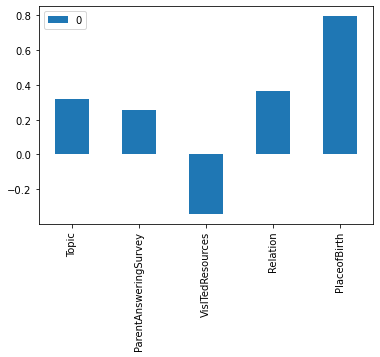

In [320]:
# Select 5 columns and find out their bias
Bias=df.skew().to_frame()
Bias=Bias.sort_values(by=Bias.columns[0])
Bias1=Bias.sample(n=10)
Bias1.iloc[:5].plot(kind='bar')


## Step 5:
### Find out for all the variables which is their correlation with the class

Sometimes we need to reduce the ammount of features we feed the model in order to make it more lighweight, so we either select the best ones or take out the most useless ones.

In [336]:
# Select the top 4 most correlated and put them in a different dataset
correlation ={}
for data in df.columns:
    correlation[data] = df[data].corr(df['Class'])
    
correlation =pd.DataFrame(list(correlation.items()),columns =['data','correlation'])
top_correlation =correlation.sort_values(by='correlation', ascending=False)[:5]
print(correlation)


                        data  correlation
0                     gender     0.123675
1                NationalITy     0.064883
2               PlaceofBirth     0.080377
3                    StageID    -0.011696
4                    GradeID     0.043887
5                  SectionID    -0.017597
6                      Topic     0.039794
7                   Semester     0.043287
8                   Relation     0.272111
9                raisedhands     0.231016
10          VisITedResources     0.161748
11         AnnouncementsView     0.143996
12                Discussion     0.121971
13     ParentAnsweringSurvey    -0.123254
14  ParentschoolSatisfaction    -0.146277
15        StudentAbsenceDays    -0.199083
16                     Class     1.000000


array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [342]:
# Select the top 4 least correlated and create a new dataset without them
Least_correlation =correlation.sort_values(by='correlation', ascending=False)[-4:]
new_correlation =correlation.sort_values(by='correlation', ascending=False)[:-4]
df_new = df[new_correlation['data'].values]
df_new

,Class,Relation,raisedhands,VisITedResources,AnnouncementsView,gender,Discussion,PlaceofBirth,NationalITy,GradeID,Semester,Topic,StageID
0,0,0,15,16,2,0,20,0,0,0,0,0,0
1,0,0,20,20,3,0,25,0,0,0,0,0,0
2,1,0,10,7,0,0,30,0,0,0,0,0,0
3,1,0,30,25,5,0,35,0,0,0,0,0,0
4,0,0,40,50,12,0,50,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,5,4,5,1,8,5,5,2,1,10,1
476,0,0,50,77,14,1,28,5,5,2,0,11,1
477,0,0,55,74,25,1,29,5,5,2,1,11,1
478,1,0,30,17,14,1,57,5,5,2,0,8,1


## Step 6:
### Visualize the correlation between the previously selected 4 most correlated variables with the class

Lets see if those are correlated too.


<AxesSubplot:>

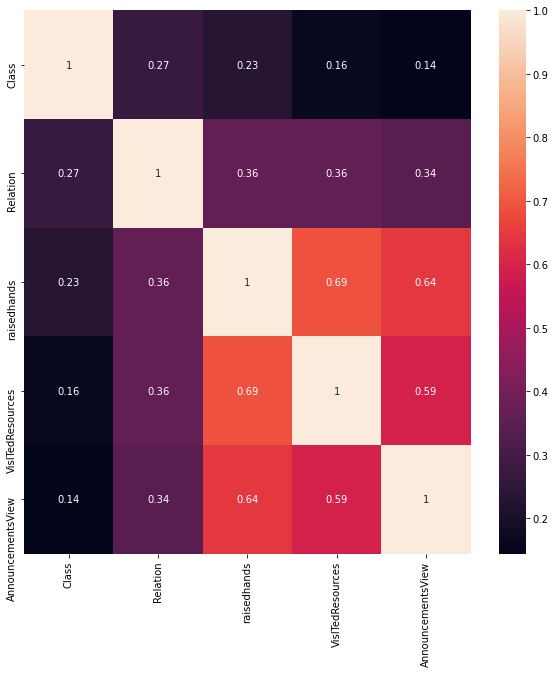

In [379]:
# Plot the correlation among themself for the previous 4 variables.
import seaborn as sns
plt.figure(figsize=(10,10))
df_top_corr = df[top_correlation['data'].values]
sns.heatmap(df_top_corr.corr(),annot=True)

## Step 7:
### For the previoys 4 variables plot them AGAINST the class


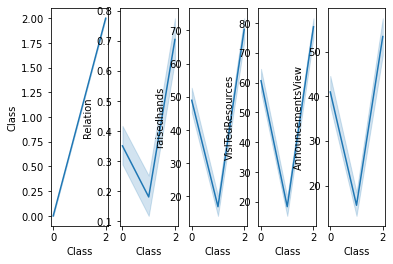

In [389]:
# make 4 plot where you plot each of the variables with the class
# plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(),annot=True)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5)
for i, col in enumerate(df_top_corr.columns):
    plt= sns.lineplot(data=df_top_corr, x="Class", y=col, ax=axs[i])

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as L

In [421]:
# compute the probability
df =pd.read_csv("xAPI-Edu-Data.csv")
cases_U7= df.loc[df['StudentAbsenceDays'] == 'Under-7']
cases_L = cases_U7.loc[df['Class']=='L'].shape[0]
prob_L =cases_L/len(df['StudentAbsenceDays'])
print("probability of him being classified as L is {:.4f}".format(prob_L))

probability of him being classified as L is 0.0229


## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as m or higher, using the previous calculation

In [425]:
# Looking at step seven extrapolate from it the probability of a student being classified as M or H
# considering under_7 cases each probability
cases_M = cases_U7.loc[df['Class']=='M'].shape[0]
cases_H = cases_U7.loc[df['Class']=='H'].shape[0]

prob_H =cases_H/len(df['StudentAbsenceDays'])
prob_M =cases_M/len(df['StudentAbsenceDays'])

print("probability of him being classified as M is {:.4f} as H is {:.4f}".format(prob_M,prob_H))

#  probability of a student being classified as M or H
print("probability of him being classified as M Or H is {:.4f}".format(1-prob_L))

probability of him being classified as M is 0.2917 as H is 0.2875
probability of him being classified as M Or H is 0.9771


## Step 9:
### Probability time, knowing a student was classified as H, what is the probability of him having raised the hand more than 10 times

In [437]:
# Bayes time
stu_H= df.loc[df['Class'] == 'H']
grt_10 = stu_H.loc[df['raisedhands'] > 10].shape[0]
prob_10 =grt_10/len(stu_H)
print("probability of raised hand more than 10 times, knowing as H  is {:.4f}".format(prob_10))

probability of raised hand more than 10 times, knowing as H  is 0.9930


## Step 10:
### Free time, if I was the principal of the school what plots and probabilities would you show me to help me accept only M and H students.